In [499]:
import numpy as np
import matplotlib.pyplot as plt
import numba 
from numba import prange

from Single_Var_QR import SingleQRSampler_T_4_block
from Single_Var_QR_utils import geometric_seq


In [500]:
from typing import Union

In [501]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [502]:
%autoreload 2

# Generate some fake data

In [503]:
np.random.seed(8)

In [504]:
x_vals = np.concatenate([np.arange(-0.99,1, 0.01),
                         np.arange(-0.99,1, 0.01),
                        np.arange(-0.99,1, 0.01)])


In [505]:
from scipy.stats import norm

In [506]:
# Generate surya dataset
n_data = 1000
x_vals = np.random.uniform(-1,1,n_data)

def test_beta_0(tau):
    return 3*(tau - 0.5)*(np.log(1/(tau*(1-tau))))

def test_beta_1(tau):
    return 4*((tau-0.5)**2) * (np.log(1/(tau*(1-tau))))

def test_quantile_function_surya(tau, x):
    
    output = 3*(tau - 0.5)*(np.log(1/(tau*(1-tau)))) + 4*((tau-0.5)**2) * (np.log(1/(tau*(1-tau)))) * x

    return output



# Sample 1000 random quantiles
tau_rands = np.random.uniform(0,1,n_data)
y_vals_true = np.array([test_quantile_function_surya(tau, x) for tau, x in zip(tau_rands, x_vals)])
#y_vals_true = np.array([test_quantile_function_simple(tau, x) for tau, x in zip(tau_rands, x_vals)])


## First Plot: Single sample for multiple tau

In [507]:
# Example X_vals and tau_vals
tau_vals = np.arange(0,1,0.05)[1:]

- Use surya data 2017

In [508]:
tau_test = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
beta_0s = [test_beta_0(t) for t in tau_test]
beta_1s = [test_beta_1(t) for t in tau_test]

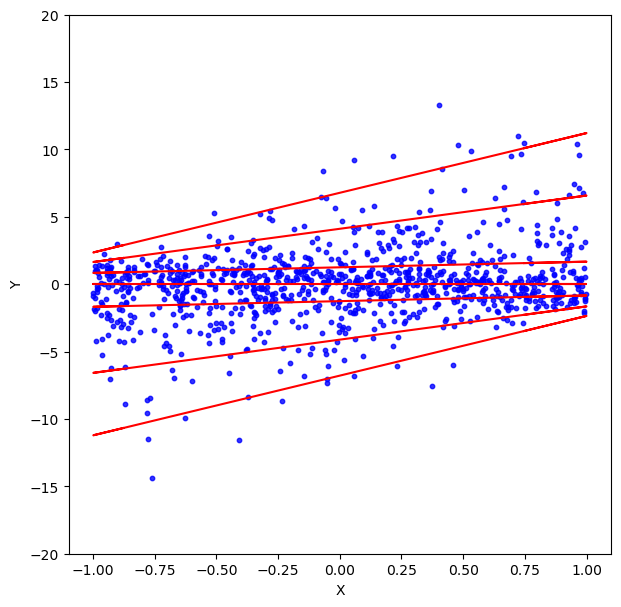

In [566]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(x_vals, y_vals_true, s=10, color='blue', alpha=0.8)
    
    
for b0,b1 in zip(beta_0s, beta_1s):
    
    y_pred_true = b0 + x_vals*b1
    
    ax.plot(x_vals, y_pred_true, c='red')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim([-20,20])
plt.savefig('Images/QR_data.png')

# MCMC Sampling

- Block (Metropolis in Gibbs):
- Block 1: Eta Function components, GP, lambda and rho
- Block 2: Remaining, mu, gamma, sigma1 and sigma2

# MCMC Sampling Loop with Approximation

Setting priors for 
- W $\sim$ GP Thingy (Just draw from multviariate)?
- $\kappa^2 \sim  IG(3,1/3)$
- $\lambda^2 \sim Ga(5,1/10)$
- $\rho \sim Unif(0,1)$
- $\sigma_1, \sigma_2 \sim Ga(2,2)$
- $\mu \sim N(0,1)$
- $\gamma \sim N(0,1)$

Block metropolis with blocks
- W, $\kappa^2$, $\lambda^2$, $\rho$
-  $\sigma_1, \sigma_2, \mu, \gamma$

Step Size Checker

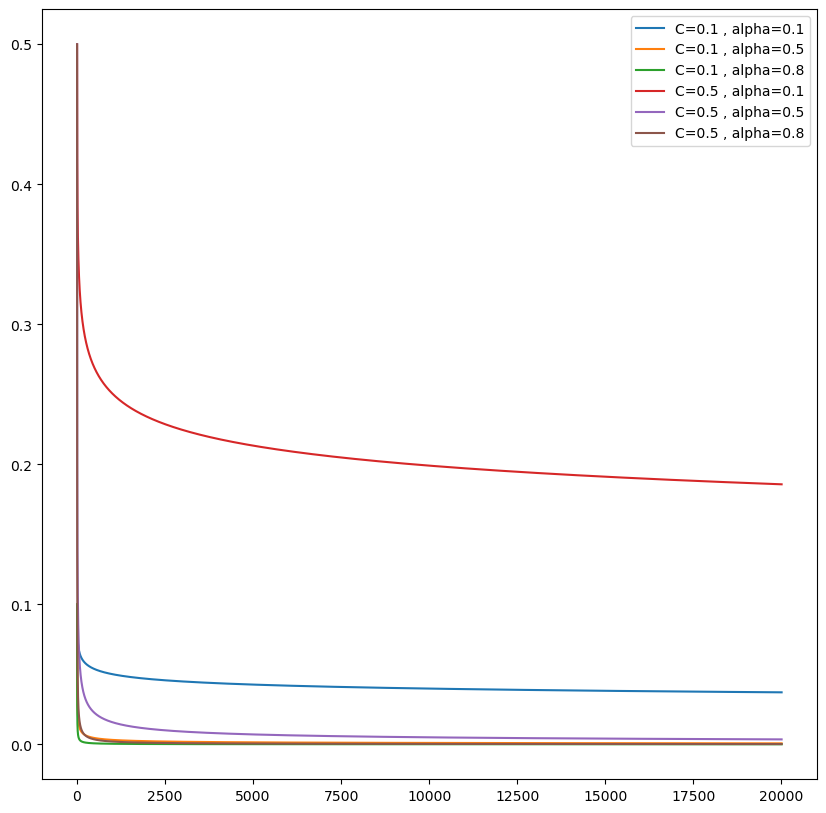

In [510]:
fig, ax = plt.subplots(figsize=(10,10))
C_1_list = [0.1,0.5]
alpha_step_size_list = [0.1,0.5,0.8]

for C_1 in C_1_list:
    for alpha_step_size_1 in alpha_step_size_list:
        n_steps = 20000
        plot_vals = C_1/(np.arange(1,n_steps+10)**alpha_step_size_1)
        
        ax.plot(np.arange(1,n_steps+10),plot_vals, label=f'C={C_1} , alpha={alpha_step_size_1}')

ax.legend()

4 Block T-mixture

In [511]:
# C = 0.1, alpha = 0.3
n_chains = 2
tau_grid_expanded = np.array([round(-0.01 + 0.01 * i,2) for i in range(103)])
tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])

data_size = n_data
tau_upper_tail = 1-1/(2*data_size)
tau_lower_tail = 1/(2*data_size)
lower_seq = np.flip(geometric_seq(0.01, tau_lower_tail, 0.005, upper=False))
upper_seq = geometric_seq(0.99, tau_upper_tail, 0.005)

tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])
tau_grid = np.concatenate([lower_seq, tau_grid, upper_seq])

tau_grid_expanded = np.concatenate([np.array([-0.01,0]),
                                    tau_grid,
                                    np.array([1,1.01])])

knot_points_grid = np.arange(0.1,1,0.1)


In [512]:

sampler_collecter_4blockt = [SingleQRSampler_T_4_block(y_vals_true,
                                    x_vals,          
                                    C_1 = 0.3,
                                    lambda_step_size_1 = 3,
                                    alpha_step_size_1 = 0.4,
                                    a_target_1 = 0.234,
                                    C_2 = 0.3,
                                    lambda_step_size_2 = 3,
                                    alpha_step_size_2 = 0.4,
                                    a_target_2 = 0.234,
                                    C_3 = 0.5,
                                    lambda_step_size_3 = 3,
                                    alpha_step_size_3 = 0.4,
                                    a_target_3 = 0.234,
                                    C_4 = 0.3,
                                    lambda_step_size_4 = 3,
                                    alpha_step_size_4 = 0.4,
                                    a_target_4 = 0.234,
                                    tau_grid_expanded = tau_grid_expanded,
                                    tau_grid = tau_grid,     
                                    knot_points_grid = knot_points_grid,
                                    am_lamb_block1_init = (2.38**2)/(9),
                                    am_lamb_block2_init = (2.38**2)/(9),
                                    am_lamb_block3_init = (2.38**2)/4,
                                    am_lamb_block4_init = (2.38**2)/(9*2+4),
                                    alpha_kappa = 0.1,
                                    beta_kappa = 0.1,
                                    eps_1 = 0,
                                    eps_2 = 0,
                                    base_quantile_mean=0.0,
                                    base_quantile_sd=1.0,
                                    base_quantile_v=1.0,
                                    base_quantile_dist='t',
                                    splice=True) for _ in range(n_chains)]

chain_outputs = [sampler_c.sample(n_steps=20000) for sampler_c in sampler_collecter_4blockt]

sampler_collecter = sampler_collecter_4blockt

Lambda Current:  4
Mu Current:  0
Gamma Current:  0
Sigma 1 Current:  1
Sigma 2 Current:  1
Step:  1000  Time Taken:  13.021836757659912 Block 1 Accept:  33.65853658536585  Block 2 Accept:  15.151515151515152  Block 3 Accept:  5.154639175257732  Block 4 Accept:  33.73253493013972  Sampled Prop:  [0.205 0.198 0.097 0.501]
Lambda Current:  4
Mu Current:  0.27183250800575137
Gamma Current:  0.15644619823089734
Sigma 1 Current:  0.7799652595057415
Sigma 2 Current:  1.201762277608558
Step:  2000  Time Taken:  10.859853982925415 Block 1 Accept:  29.67581047381546  Block 2 Accept:  24.407582938388625  Block 3 Accept:  14.130434782608695  Block 4 Accept:  27.06237424547284  Sampled Prop:  [0.2005 0.211  0.092  0.497 ]
Lambda Current:  4
Mu Current:  -0.1345916953840977
Gamma Current:  -0.06890471625212605
Sigma 1 Current:  0.8071330412699235
Sigma 2 Current:  1.116817409458029
Step:  3000  Time Taken:  11.307278633117676 Block 1 Accept:  26.029654036243823  Block 2 Accept:  26.43312101910828  

# Chain Eval

## Kappa and Lambda

In [513]:
color_scheme = ['tab:blue','tab:red', 'tab:green','tab:orange']

## Mu Gamma Sigmas

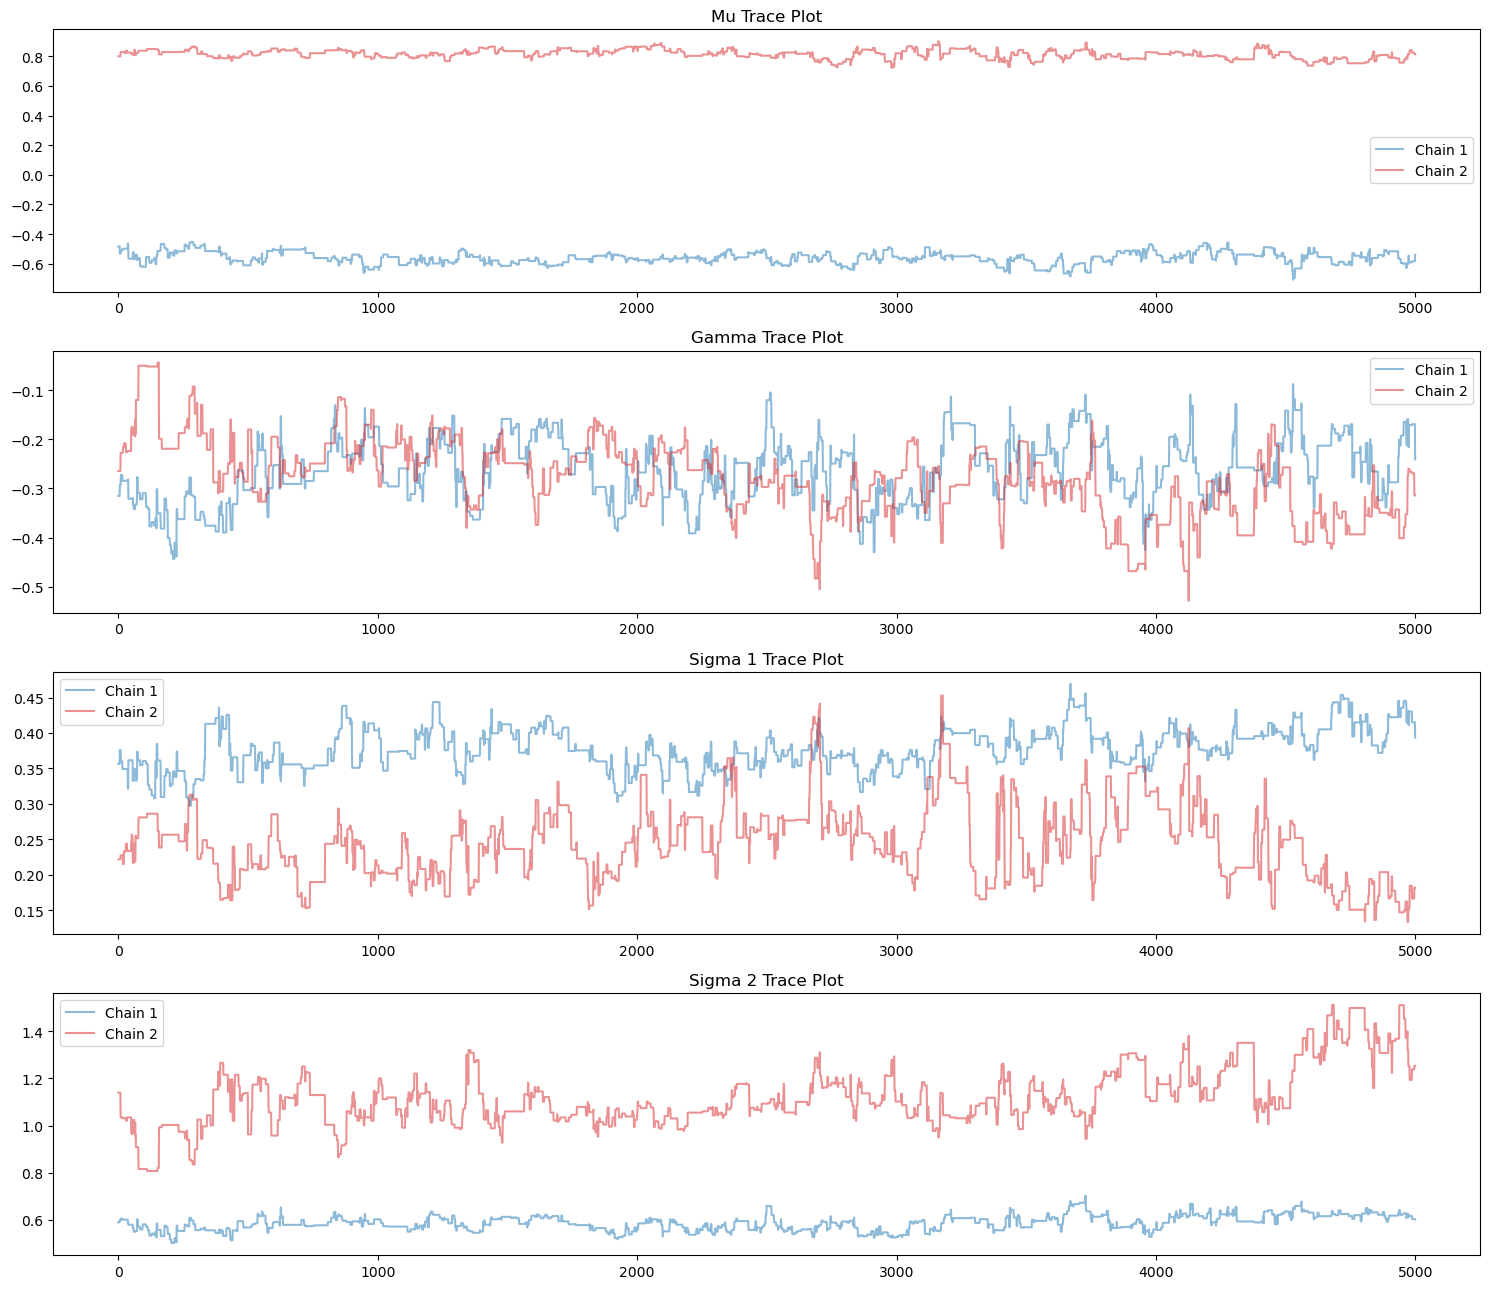

In [514]:
fig, ax = plt.subplots(4,1,figsize=(15,13))
n_burn_in = 15000

for i in range(n_chains):
    ax[0].plot(chain_outputs[i]['mu'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[1].plot(chain_outputs[i]['gamma'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[2].plot(chain_outputs[i]['sigma_1'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[3].plot(chain_outputs[i]['sigma_2'][n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')

ax[0].set_title('Mu Trace Plot')
ax[1].set_title('Gamma Trace Plot')
ax[2].set_title('Sigma 1 Trace Plot')
ax[3].set_title('Sigma 2 Trace Plot')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.tight_layout()

## Checking Correlation Between Parameters

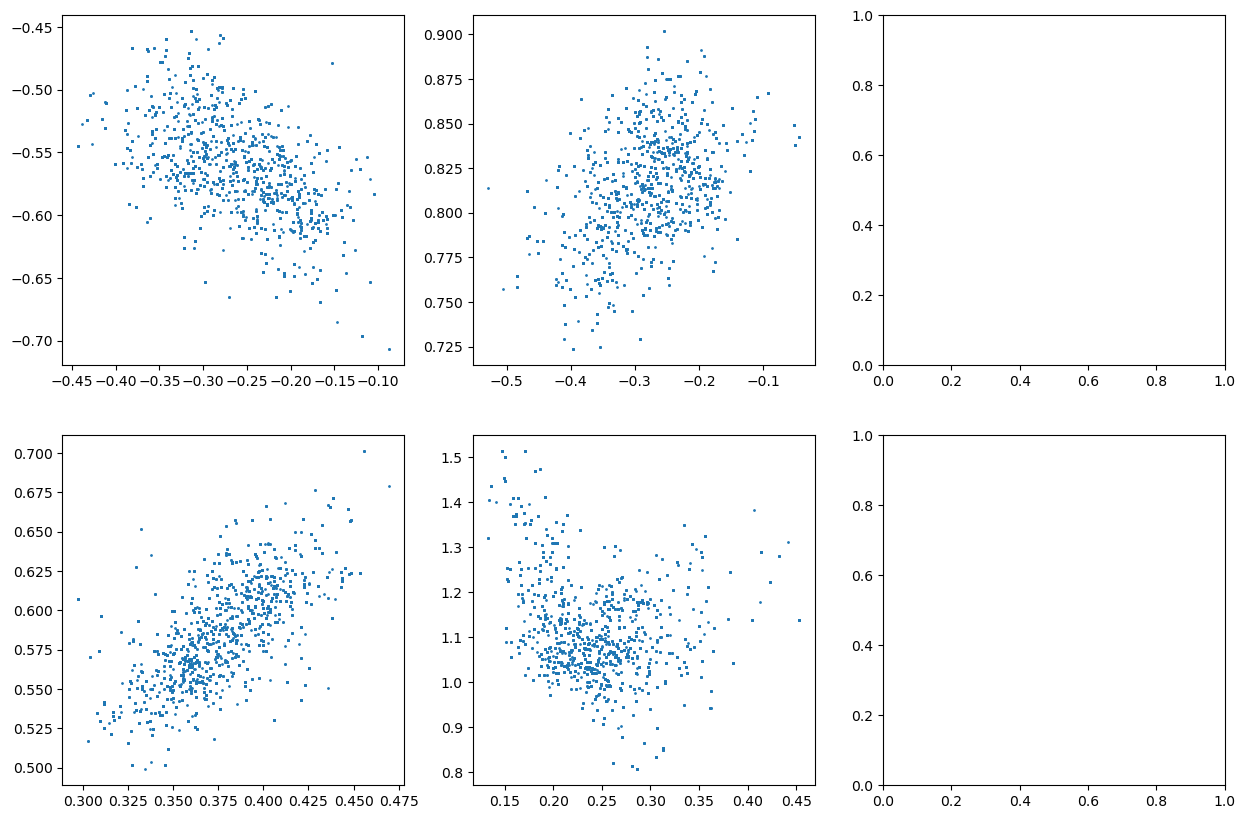

In [515]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

# mu gamma
for i in range(n_chains):
    
    gamma_samps = chain_outputs[i]['gamma'][n_burn_in:]
    mu_samps = chain_outputs[i]['mu'][n_burn_in:]
    
    ax[0,i].scatter(gamma_samps, mu_samps, s=1)
    
# sigma-sigma
for i in range(n_chains):
    
    sigma_1_samps = chain_outputs[i]['sigma_1'][n_burn_in:]
    sigma_2_samps = chain_outputs[i]['sigma_2'][n_burn_in:]
    
    ax[1,i].scatter(sigma_1_samps, sigma_2_samps, s=1)
    

## Inferred Beta 0 Beta 1 at various tau levels

In [516]:
from typing import List
from Single_Var_QR_utils import *


In [517]:
chain_outputs[i]['w'][0].shape[0]/2

113.0

In [518]:
def generate_beta_samples(tau_input: float,
                          tau_grid: np.ndarray,
                          w_approx_store: List[np.ndarray],
                          mu_store: List[float],
                          gamma_store: List[float],
                          sigma_1_store: List[float],
                          sigma_2_store: List[float]):

    beta_0_store = []
    beta_1_store = []
    for i in range(0,len(w_approx_store)):
        w_samp = w_approx_store[i]
        L = int(w_samp.shape[0]/2)
        w1_samp = w_samp[0:L]
        w2_samp = w_samp[L:]

        mu_samp = mu_store[i]
        gamma_samp = gamma_store[i]
        sigma_1_samp = sigma_1_store[i]
        sigma_2_samp = sigma_2_store[i]


        eta_1_samp = eta_function_i_vector(tau_input=np.array([tau_input]),
                                             w_vals=w1_samp,
                                             tau_grid=tau_grid,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1.0,
                                             sigma=sigma_1_samp,
                                             dist='t')[0]


        eta_2_samp = eta_function_i_vector(tau_input=np.array([tau_input]),
                                             w_vals=w2_samp,
                                             tau_grid=tau_grid,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1.0,
                                             sigma=sigma_2_samp,
                                             dist='t')[0]


        beta_0_samp = mu_samp + (eta_1_samp + eta_2_samp)/2
        beta_1_samp = gamma_samp + (eta_2_samp - eta_1_samp)/2

        beta_0_store.append(beta_0_samp)
        beta_1_store.append(beta_1_samp)
        
    return beta_0_store, beta_1_store

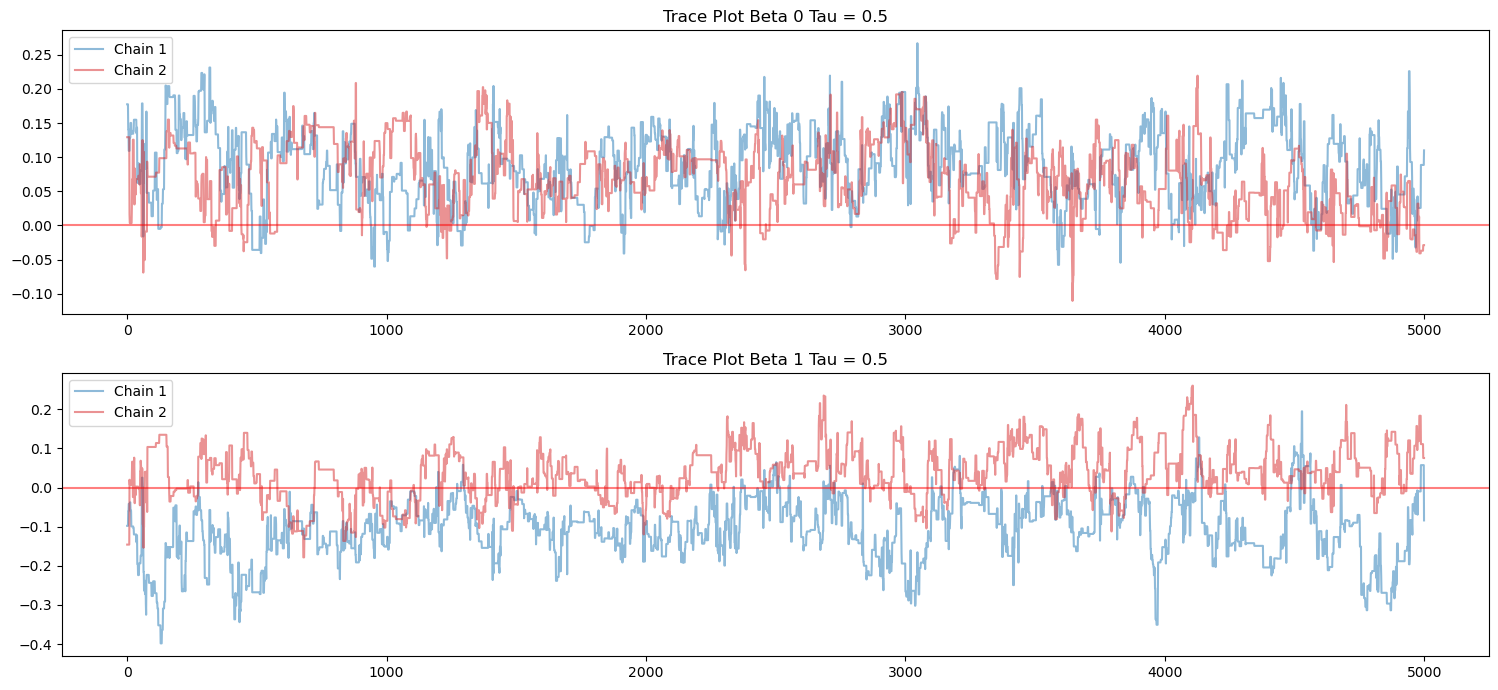

In [519]:
fig,ax = plt.subplots(2,1, figsize=(15,7))

input_tau = 0.5

#tau_grid_expanded = np.arange(-0.01,1.02,0.01)

tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])
tau_grid = np.concatenate([lower_seq, tau_grid, upper_seq])

tau_grid_expanded = np.concatenate([np.array([-0.01,0]),
                                    tau_grid,
                                    np.array([1,1.01])])

for i in range(n_chains):
    
    beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=input_tau,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])

    
    ax[0].plot(beta_0_samps[n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    ax[1].plot(beta_1_samps[n_burn_in:], alpha=0.5, c=color_scheme[i], label=f'Chain {i+1}')
    
ax[0].axhline(test_beta_0(input_tau),c='red', alpha=0.5)
ax[1].axhline(test_beta_1(input_tau),c='red', alpha=0.5)

ax[0].legend()
ax[1].legend()

ax[0].set_title('Trace Plot Beta 0 Tau = '+str(input_tau))
ax[1].set_title('Trace Plot Beta 1 Tau = '+str(input_tau))
plt.tight_layout()

Plot Example lines

In [520]:
y_pred_samples = np.array([b0 + b1*x_vals for b0,b1 in zip(beta_0_samps, beta_1_samps)])
y_pred_samples = y_pred_samples[n_burn_in:]

In [521]:
log_scores = [np.mean(s.log_score[n_burn_in:]) for s in sampler_collecter]

In [522]:
log_scores

[-2232.3586081509957, -2223.19262504448]

In [523]:
#tau_grid_expanded = np.array([round(-0.01 + 0.01 * i,2) for i in range(103)])
#tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])

tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])
tau_grid = np.concatenate([lower_seq, tau_grid, upper_seq])

tau_grid_expanded = np.concatenate([np.array([-0.01,0]),
                                    tau_grid,
                                    np.array([1,1.01])])

Text(0.5, 0.98, 'Posterior Estimates for Various Quantile Levels')

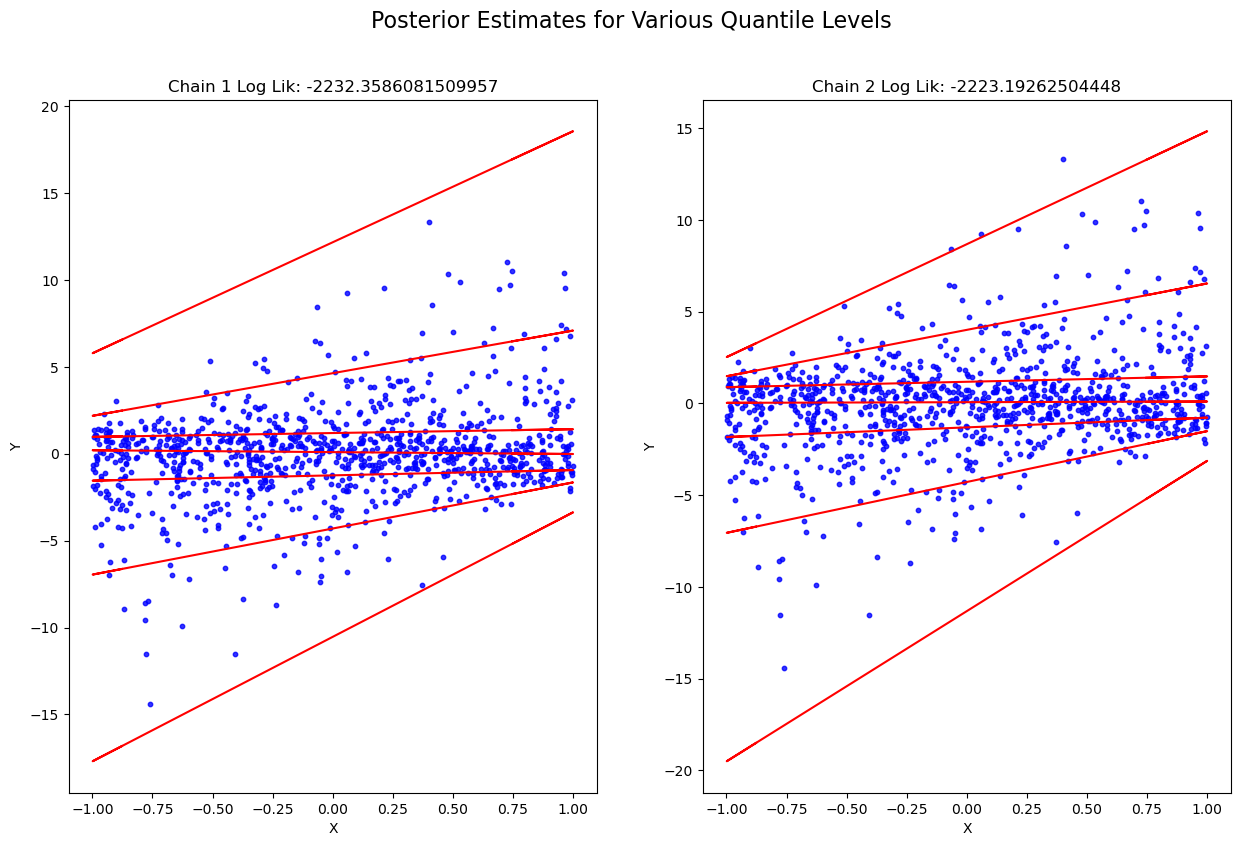

In [524]:
fig, ax = plt.subplots(1,2,figsize=(15,9))

for i in range(n_chains):
    ax[i].scatter(x_vals, y_vals_true, s=10, color='blue', alpha=0.8)

#sample_quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
sample_quantiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
#sample_quantiles = [0.5]

for sq in sample_quantiles:
    
    for i in range(n_chains):
        beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=sq,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])

        y_pred_samples = np.array([b0 + b1*x_vals for b0,b1 in zip(beta_0_samps, beta_1_samps)])
        y_pred_samples = y_pred_samples[n_burn_in:]
        
        ax[i].plot(x_vals, y_pred_samples.mean(0), color='red')

for i in range(n_chains):    
    ax[i].title.set_text(f'Chain {i+1}'+' Log Lik: ' + str(log_scores[i]))
        
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

#ax[0].set_ylim([-4,4])
#ax[1].set_ylim([-4,4])

ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')


fig.suptitle('Posterior Estimates for Various Quantile Levels', fontsize=16)

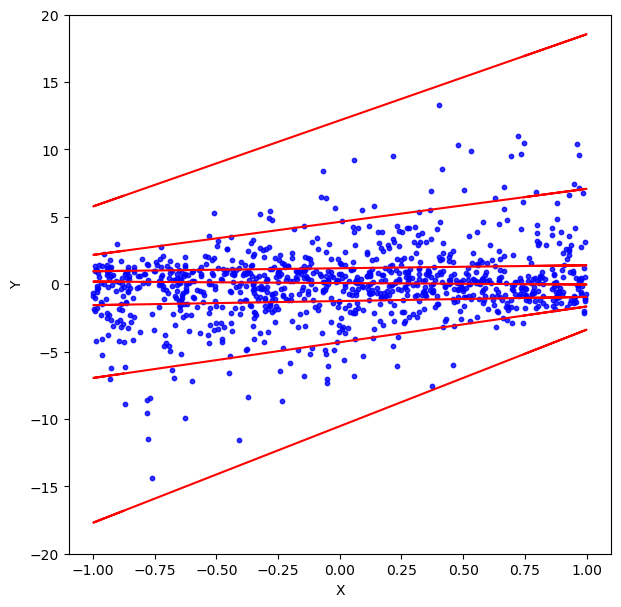

In [567]:
# Save image for plotting
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(x_vals, y_vals_true, s=10, color='blue', alpha=0.8)

#sample_quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
sample_quantiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
#sample_quantiles = [0.5]

for sq in sample_quantiles:
    
    for i in range(1):
        beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=sq,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])

        y_pred_samples = np.array([b0 + b1*x_vals for b0,b1 in zip(beta_0_samps, beta_1_samps)])
        y_pred_samples = y_pred_samples[n_burn_in:]
        
        ax.plot(x_vals, y_pred_samples.mean(0), color='red')
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim([-20,20])

plt.savefig('Images/QR_model_est.png')


In [525]:
import arviz as az

## Plot Posterior GPs

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/3947510274.py:82: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  w_approx_1_cis = az.hdi(w_approx_store_plot[:,0:L])
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/3947510274.py:85: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  w_approx_2_cis = az.hdi(w_approx_store_plot[:,L:])
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/3947510274.py:89: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  eta_1_cis = az.hdi(eta_1_collect)
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/3947510274.py:92: FutureWarning: hdi currently interprets 2d data as 

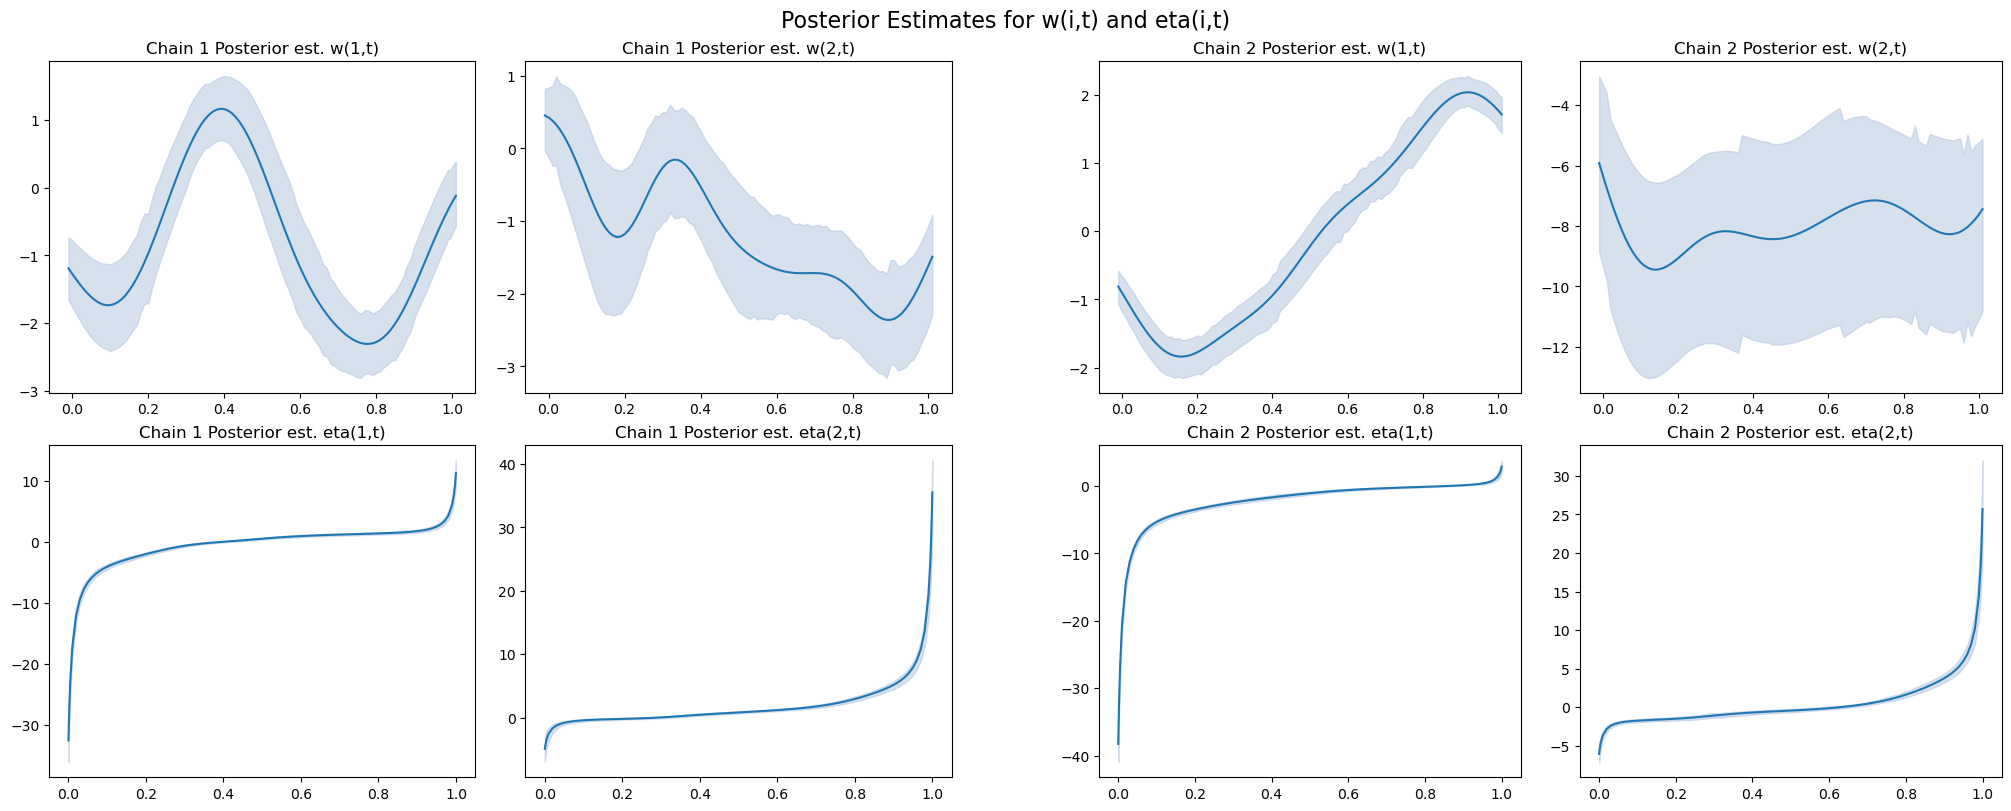

In [526]:
fig = plt.figure(layout='constrained', figsize=(20, 8))
subfigs = fig.subfigures(1, 2, wspace=0.1)

# Define left and right subfigure for chain 1 and 2
ax_left = subfigs[0].subplots(2,2)
ax_right = subfigs[1].subplots(2,2)

n_burn_in = 15000

#tau_grid_expanded = np.array([round(-0.01 + 0.01 * i,2) for i in range(103)])
#tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])

tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])
tau_grid = np.concatenate([lower_seq, tau_grid, upper_seq])

tau_grid_expanded = np.concatenate([np.array([-0.01,0]),
                                    tau_grid,
                                    np.array([1,1.01])])


# Iterate over chains
for c in range(n_chains):
    
    mu_store=chain_outputs[c]['mu']
    gamma_store=chain_outputs[c]['gamma']
    sigma_1_store=chain_outputs[c]['sigma_1']
    sigma_2_store=chain_outputs[c]['sigma_2']
    
    w_approx_store = chain_outputs[c]['w']
    w_approx_store_plot = np.vstack(w_approx_store)[n_burn_in:,:]
    
    eta_1_collect = []
    eta_2_collect = []
    
    # Pass each function through the integrator to get xi
    for i in range(w_approx_store_plot.shape[0]):
        w_samp = w_approx_store_plot[i,:]
        
        L = int(w_samp.shape[0]/2)
        
        w1_samp = w_samp[0:L]
        w2_samp = w_samp[L:]

        mu_samp = mu_store[i+n_burn_in]
        gamma_samp = gamma_store[i+n_burn_in]
        sigma_1_samp = sigma_1_store[i+n_burn_in]
        sigma_2_samp = sigma_2_store[i+n_burn_in]
        
        
        # Get eta 1 and eta 2
        eta_1_samp = eta_function_i_vector(tau_input=tau_grid,
                                             w_vals=w1_samp,
                                             tau_grid=tau_grid_expanded,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1.0,
                                             sigma=sigma_1_samp,
                                             dist='t')


        eta_2_samp = eta_function_i_vector(tau_input=tau_grid,
                                             w_vals=w2_samp,
                                             tau_grid=tau_grid_expanded,
                                             mean=0.0,
                                             sd=1.0,
                                             v=1.0,
                                             sigma=sigma_2_samp,
                                             dist='t')
        
        # Get resulting beta_0 and beta_1 samples
        beta_0_samp = mu_samp + (eta_1_samp + eta_2_samp)/2
        beta_1_samp = gamma_samp + (eta_2_samp - eta_1_samp)/2
        
        eta_1_collect.append(eta_1_samp)
        eta_2_collect.append(eta_2_samp)
        
    eta_1_collect = np.array(eta_1_collect)
    eta_2_collect = np.array(eta_2_collect)
        
    # Get w means and CIs
    w_approx_1_mean = w_approx_store_plot[:,0:L].mean(0)
    w_approx_1_cis = az.hdi(w_approx_store_plot[:,0:L])
    
    w_approx_2_mean = w_approx_store_plot[:,L:].mean(0)
    w_approx_2_cis = az.hdi(w_approx_store_plot[:,L:])
    
    # Get eta mean and CIs
    eta_1_mean = eta_1_collect.mean(0)
    eta_1_cis = az.hdi(eta_1_collect)
    
    eta_2_mean = eta_2_collect.mean(0)
    eta_2_cis = az.hdi(eta_2_collect)
    
    
    if c == 0:
        ax_left[0,0].plot(tau_grid_expanded, w_approx_1_mean, color='tab:blue')
        ax_left[0,0].fill_between(tau_grid_expanded, w_approx_1_cis[:,0],
                        w_approx_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[0,1].plot(tau_grid_expanded, w_approx_2_mean, color='tab:blue')
        ax_left[0,1].fill_between(tau_grid_expanded, w_approx_2_cis[:,0],
                        w_approx_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[0,0].title.set_text(f"Chain {c+1} Posterior est. w(1,t)")
        ax_left[0,1].title.set_text(f"Chain {c+1} Posterior est. w(2,t)")
        
        #ax_left[0,0].plot(tau_grid_expanded, w_approx_store_plot[:,0:103].T, c='tab:blue', alpha=0.1)
        #ax_left[0,1].plot(tau_grid_expanded, w_approx_store_plot[:,103:].T, c='tab:blue', alpha=0.1)
        
        #ax_left[1,0].plot(tau_grid, eta_1_collect.T, c='tab:blue', alpha=0.1)
        #ax_left[1,1].plot(tau_grid, eta_2_collect.T, c='tab:blue', alpha=0.1)
        
        ax_left[1,0].plot(tau_grid, eta_1_mean, color='tab:blue')
        ax_left[1,0].fill_between(tau_grid, eta_1_cis[:,0],
                        eta_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[1,1].plot(tau_grid, eta_2_mean, color='tab:blue')
        ax_left[1,1].fill_between(tau_grid, eta_2_cis[:,0],
                        eta_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_left[1,0].title.set_text(f"Chain {c+1} Posterior est. eta(1,t)")
        ax_left[1,1].title.set_text(f"Chain {c+1} Posterior est. eta(2,t)")
        
    
    else:
        ax_right[0,0].plot(tau_grid_expanded, w_approx_1_mean, color='tab:blue')
        ax_right[0,0].fill_between(tau_grid_expanded, w_approx_1_cis[:,0],
                        w_approx_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[0,1].plot(tau_grid_expanded, w_approx_2_mean, color='tab:blue')
        ax_right[0,1].fill_between(tau_grid_expanded, w_approx_2_cis[:,0],
                        w_approx_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[0,0].title.set_text(f"Chain {c+1} Posterior est. w(1,t)")
        ax_right[0,1].title.set_text(f"Chain {c+1} Posterior est. w(2,t)")
        
        #ax_right[0,0].plot(tau_grid_expanded, w_approx_store_plot[:,0:103].T, c='tab:blue', alpha=0.1)
        #ax_right[0,1].plot(tau_grid_expanded, w_approx_store_plot[:,103:].T, c='tab:blue', alpha=0.1)
        
        ax_right[1,0].plot(tau_grid, eta_1_mean, color='tab:blue')
        ax_right[1,0].fill_between(tau_grid, eta_1_cis[:,0],
                        eta_1_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[1,1].plot(tau_grid, eta_2_mean, color='tab:blue')
        ax_right[1,1].fill_between(tau_grid, eta_2_cis[:,0],
                        eta_2_cis[:,1], color='lightsteelblue', alpha=.5)
        
        ax_right[1,0].title.set_text(f"Chain {c+1} Posterior est. eta(1,t)")
        ax_right[1,1].title.set_text(f"Chain {c+1} Posterior est. eta(2,t)")
        
        
fig.suptitle('Posterior Estimates for w(i,t) and eta(i,t)', fontsize=16)
plt.show()



## Plot Posterior Betas

In [527]:
#tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])

tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])
tau_grid = np.concatenate([lower_seq, tau_grid, upper_seq])


tau_grid_expanded = np.concatenate([np.array([-0.01,0]),
                                    tau_grid,
                                    np.array([1,1.01])])

tau_grid = np.array([round(0.01 + 0.01 * i,2) for i in range(99)])


chain_store = []
for i in range(n_chains):
    b0_val_samples = []
    b1_val_samples = []
    for sq in tau_grid:
        beta_0_samps, beta_1_samps = generate_beta_samples(tau_input=sq,
                                                      tau_grid=tau_grid_expanded,
                                                      w_approx_store=chain_outputs[i]['w'],
                                                      mu_store=chain_outputs[i]['mu'],
                                                      gamma_store=chain_outputs[i]['gamma'],
                                                      sigma_1_store=chain_outputs[i]['sigma_1'],
                                                      sigma_2_store=chain_outputs[i]['sigma_2'])
    
        b0_val_samples.append(beta_0_samps)
        b1_val_samples.append(beta_1_samps)
    
    b0_val_samples = np.array(b0_val_samples)
    b1_val_samples = np.array(b1_val_samples)
    
    chain_store.append([b0_val_samples, b1_val_samples])

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/345786256.py:13: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  b0_cis = az.hdi(b0_samples.T[n_burn_in:])
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/345786256.py:16: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  b1_cis = az.hdi(b1_samples.T[n_burn_in:])


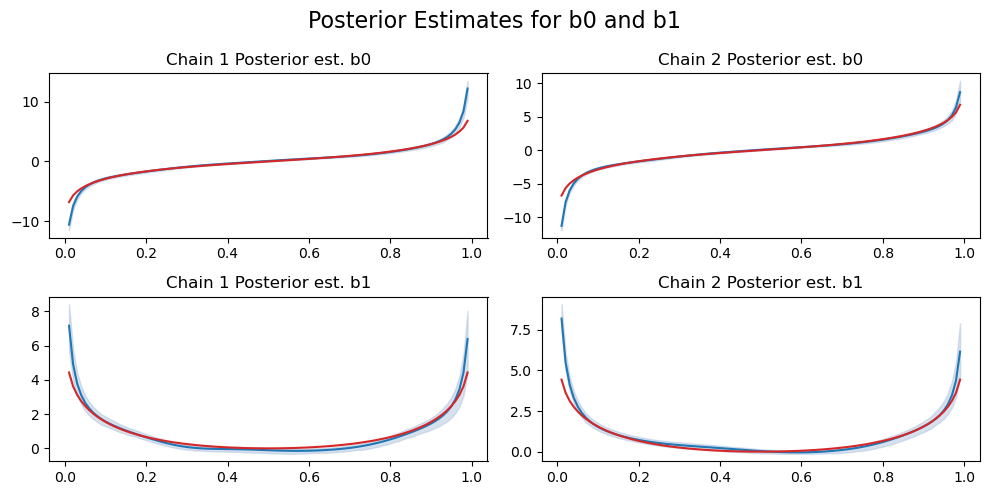

In [528]:
fig, ax = plt.subplots(2,2,figsize=(10,5))

# Get true values
beta_0_true = test_beta_0(tau_grid)
beta_1_true = test_beta_1(tau_grid)

for c in range(n_chains):

    b0_samples, b1_samples = chain_store[c]
    
    # Get b0 b1 means and CIs
    b0_mean = b0_samples.T[n_burn_in:].mean(0)
    b0_cis = az.hdi(b0_samples.T[n_burn_in:])
    
    b1_mean = b1_samples.T[n_burn_in:].mean(0)
    b1_cis = az.hdi(b1_samples.T[n_burn_in:])
    
    
    # Plot values
    ax[0,c].plot(tau_grid, b0_mean, color='tab:blue')
    ax[0,c].fill_between(tau_grid, b0_cis[:,0],
                    b0_cis[:,1], color='lightsteelblue', alpha=.5)
    
    ax[1,c].plot(tau_grid, b1_mean, color='tab:blue')
    ax[1,c].fill_between(tau_grid, b1_cis[:,0],
                    b1_cis[:,1], color='lightsteelblue', alpha=.5)
    

    ax[0,c].plot(tau_grid,beta_0_true,c = 'tab:red',alpha = 1)
    ax[1,c].plot(tau_grid,beta_1_true,c = 'tab:red',alpha = 1)
    
    ax[0,c].title.set_text(f"Chain {c+1} Posterior est. b0")
    ax[1,c].title.set_text(f"Chain {c+1} Posterior est. b1")

fig.suptitle('Posterior Estimates for b0 and b1', fontsize=16)

plt.tight_layout()
plt.show()

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/3488693749.py:10: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  b0_comb_cis = az.hdi(b0_samples_comb.T)
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_46580/3488693749.py:13: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  b1_comb_cis = az.hdi(b1_samples_comb.T)


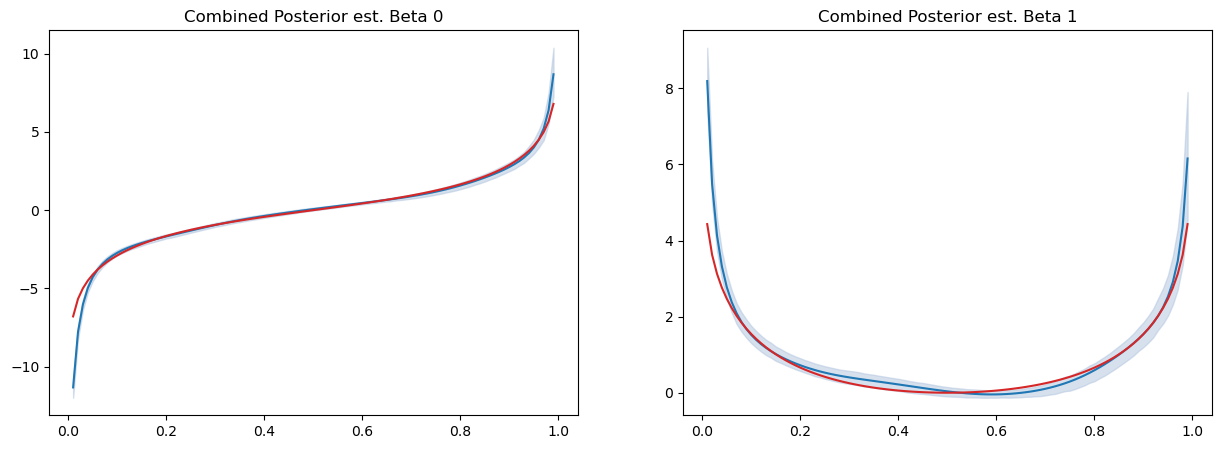

In [564]:
# Get combined error
b0_samples_comb = np.hstack([chain_store[0][0][:,n_burn_in:],
                         chain_store[1][0][:,n_burn_in:]])

b1_samples_comb = np.hstack([chain_store[0][1][:,n_burn_in:],
                         chain_store[1][1][:,n_burn_in:]])

# Get b0 b1 means and CIs
b0_comb_mean = b0_samples_comb.T.mean(0)
b0_comb_cis = az.hdi(b0_samples_comb.T)

b1_comb_mean = b1_samples_comb.T.mean(0)
b1_comb_cis = az.hdi(b1_samples_comb.T)

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(tau_grid, b0_mean, color='tab:blue')
ax[0].fill_between(tau_grid, b0_cis[:,0],
                b0_cis[:,1], color='lightsteelblue', alpha=.5)

ax[1].plot(tau_grid, b1_mean, color='tab:blue')
ax[1].fill_between(tau_grid, b1_cis[:,0],
                b1_cis[:,1], color='lightsteelblue', alpha=.5)


ax[0].plot(tau_grid,beta_0_true,c = 'tab:red',alpha = 1)
ax[1].plot(tau_grid,beta_1_true,c = 'tab:red',alpha = 1)

ax[0].title.set_text(f"Combined Posterior est. Beta 0")
ax[1].title.set_text(f"Combined Posterior est. Beta 1")

plt.savefig('Images/QR_beta_est.png')

In [530]:
import pandas as pd
output_frame = pd.DataFrame({'B0_mean': b0_comb_mean,
              'B0_lo': b0_comb_cis[:,0],
              'B0_hi': b0_comb_cis[:,1],
              'B1_mean': b1_comb_mean,
              'B1_lo': b1_comb_cis[:,0],
              'B1_hi': b1_comb_cis[:,1],
              'B0_true': beta_0_true,
              'B1_true': beta_1_true}
              )

Some processing of Surya Experiment results

In [568]:
all_run_store = []
for e_id in range(1,101):

    fp = f'Exp Results/QR Surya Dataset 2/Run_{e_id}'
    df_fp = fp+'/predictions.csv'

    run_df = pd.read_csv(df_fp)

    run_df['tau'] = tau_grid

    run_df['B0_error'] = np.abs(run_df['B0_mean']-run_df['B0_true'])
    run_df['B1_error'] = np.abs(run_df['B1_mean']-run_df['B1_true'])
    run_df['B0_covered'] = (run_df['B0_lo'] < run_df['B0_true']) & (run_df['B0_hi'] > run_df['B0_true'])
    run_df['B1_covered'] = (run_df['B1_lo'] < run_df['B1_true']) & (run_df['B1_hi'] > run_df['B1_true'])
    run_df['Run_ID'] = e_id
    all_run_store.append(run_df)

In [569]:
all_run_store = pd.concat(all_run_store)

all_run_store = all_run_store[['tau','B0_error','B1_error','B0_covered','B1_covered']].groupby(
    'tau',as_index=False).mean()

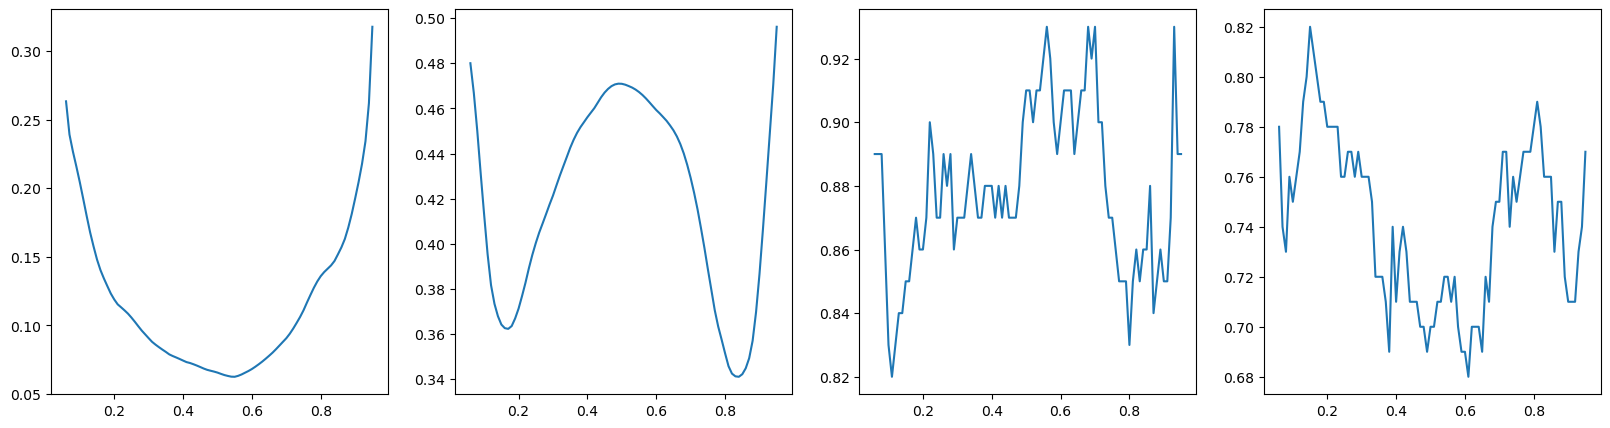

In [570]:
fig,ax = plt.subplots(1,4, figsize=(20,5))

all_run_store_plot = all_run_store.iloc[5:95,:]

ax[0].plot(all_run_store_plot['tau'], all_run_store_plot['B0_error'])
ax[1].plot(all_run_store_plot['tau'], all_run_store_plot['B1_error'])
ax[2].plot(all_run_store_plot['tau'], all_run_store_plot['B0_covered'])
ax[3].plot(all_run_store_plot['tau'], all_run_store_plot['B1_covered'])


In [554]:
all_run_store_plot

,tau,B0_error,B1_error,B0_covered,B1_covered
5,0.06,0.257683,0.418672,0.85,0.78
6,0.07,0.241253,0.411757,0.83,0.75
7,0.08,0.230000,0.406283,0.79,0.71
8,0.09,0.217516,0.396773,0.78,0.69
9,0.10,0.203310,0.386841,0.78,0.66
...,...,...,...,...,...
90,0.91,0.209375,0.339374,0.75,0.69
91,0.92,0.230648,0.360004,0.72,0.71
92,0.93,0.254509,0.382405,0.70,0.73
93,0.94,0.287765,0.407593,0.75,0.73


In [557]:
np.argmax(log_scores)

1